In [126]:
import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import init
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.datasets as dset

In [34]:
directory = "pca/"

pca_data = {}
for filename in os.listdir(directory):
    label = filename[0]
    data = np.load(directory + filename)
    if(filename[2] == "v"):
        pca_data[str(label) + "var"] = data
    else:
        pca_data[str(label)] = data


In [54]:
mnist = dset.MNIST('input', train=True, download=True, transform=T.ToTensor())
data_loader = DataLoader(mnist, batch_size=1, shuffle=True)

(28, 28)


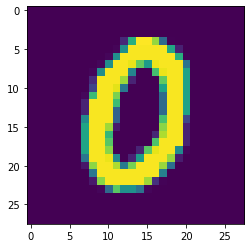

In [119]:
torch.manual_seed(18)
img = next(iter(data_loader))[0].squeeze().numpy()
print(img.shape)
og = plt.imshow(img)

In [120]:
c = 6
exp_var = pca_data[str(c) + "var"]
pc = pca_data[str(c)]

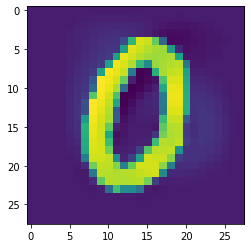

In [122]:
new = plt.imshow(pc[0].reshape(28,28) + img)

In [123]:
num_p_comp = 2
scores = exp_var[0:num_p_comp] / np.sum(exp_var[0:num_p_comp])
probs = np.exp(scores) / np.sum(np.exp(scores))

In [124]:
scale = 1
noise = (scale * probs * pc[0:num_p_comp].T).T.sum(axis=0)

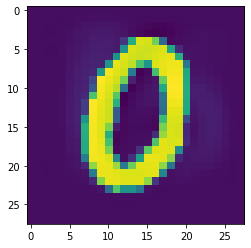

In [125]:
noised = plt.imshow(noise.reshape(28,28) + img)